In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
import os

print("Current Directory:", os.getcwd())


Current Directory: c:\Users\Whizz\Downloads


In [4]:
money_supply=pd.read_csv("M2SL.csv", index_col='observation_date',parse_dates=['observation_date'])
money_supply


,M2SL
observation_date,
1990-11-01,3262.6
1990-12-01,3271.8
1991-01-01,3287.7
1991-02-01,3304.5
1991-03-01,3321.9
...,...
2024-07-01,21039.3
2024-08-01,21141.1
2024-09-01,21222.4


In [5]:
interest_rates=pd.read_excel("FEDFUNDS.xlsx", sheet_name="Monthly",index_col='observation_date',parse_dates=['observation_date'])
interest_rates

,FEDFUNDS
observation_date,
1986-02-01,7.86
1986-03-01,7.48
1986-04-01,6.99
1986-05-01,6.85
1986-06-01,6.92
...,...
2024-08-01,5.33
2024-09-01,5.13
2024-10-01,4.83


In [6]:
cpi=pd.read_excel("CPI.xlsx",index_col='Year',parse_dates=['Year'])
cpi

,Annual Avg
Year,
1913-01-01,9.900
1914-01-01,10.000
1915-01-01,10.100
1916-01-01,10.900
1917-01-01,12.800
...,...
2020-01-01,258.811
2021-01-01,270.970
2022-01-01,292.655


In [7]:
cpi=cpi.rename_axis("observation_date")
cpi

,Annual Avg
observation_date,
1913-01-01,9.900
1914-01-01,10.000
1915-01-01,10.100
1916-01-01,10.900
1917-01-01,12.800
...,...
2020-01-01,258.811
2021-01-01,270.970
2022-01-01,292.655


In [8]:
print(money_supply.isnull().sum())  
print(interest_rates.isnull().sum())  
print(cpi.isnull().sum())

M2SL    0
dtype: int64
FEDFUNDS    0
dtype: int64
Annual Avg    0
dtype: int64


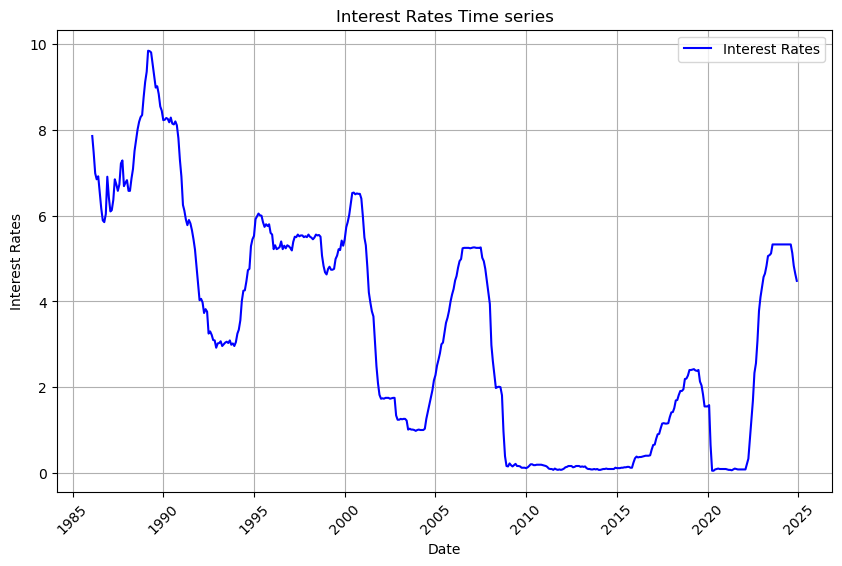

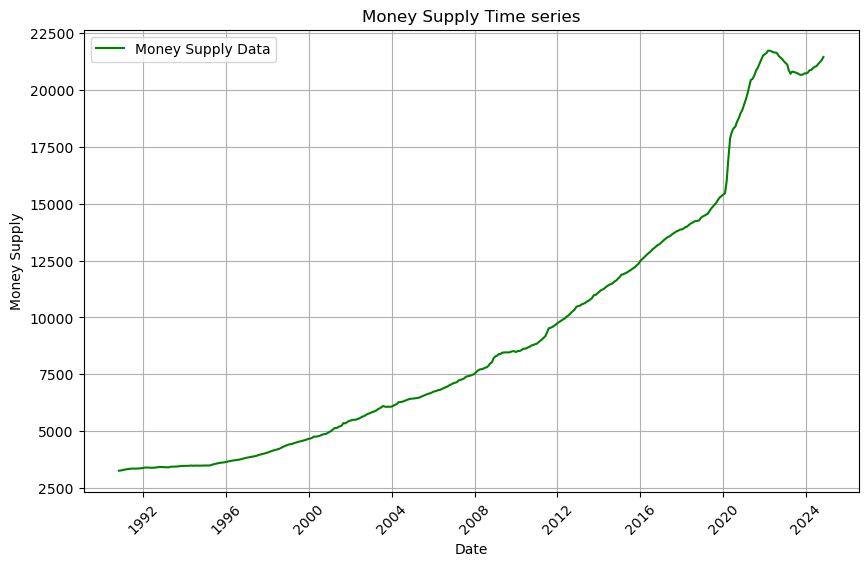

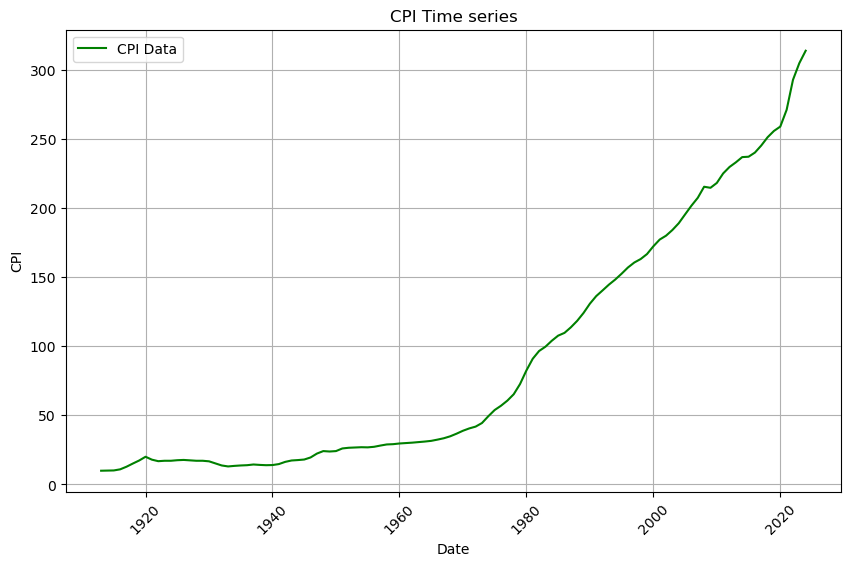

In [9]:
# Plotting Inflation Data
plt.figure(figsize=(10, 6))
plt.plot(interest_rates.index, interest_rates.values, label='Interest Rates', color='blue')
plt.title('Interest Rates Time series')
plt.xlabel('Date')
plt.ylabel('Interest Rates')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plotting Money Supply Data
plt.figure(figsize=(10, 6))
plt.plot(money_supply.index, money_supply.values, label='Money Supply Data', color='green')
plt.title('Money Supply Time series')
plt.xlabel('Date')
plt.ylabel('Money Supply')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plotting CPI Data
plt.figure(figsize=(10, 6))
plt.plot(cpi.index, cpi.values, label='CPI Data', color='green')
plt.title('CPI Time series')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

df = money_supply.merge(interest_rates, on='observation_date', how='inner')  
df = df.merge(cpi, on='observation_date', how='inner')  

# 
print(df.shape)  

(34, 3)


In [11]:
df

,M2SL,FEDFUNDS,Annual Avg
observation_date,,,
1991-01-01,3287.7,6.91,136.200
1992-01-01,3381.2,4.03,140.300
1993-01-01,3419.1,3.02,144.500
1994-01-01,3474.9,3.05,148.200
1995-01-01,3492.4,5.53,152.400
1996-01-01,3647.9,5.56,156.900
1997-01-01,3834.6,5.25,160.500
1998-01-01,4056.2,5.56,163.000
1999-01-01,4403.0,4.63,166.600


In [12]:
df=df.rename(columns={"Annual Avg":"CPI"})
df

,M2SL,FEDFUNDS,CPI
observation_date,,,
1991-01-01,3287.7,6.91,136.200
1992-01-01,3381.2,4.03,140.300
1993-01-01,3419.1,3.02,144.500
1994-01-01,3474.9,3.05,148.200
1995-01-01,3492.4,5.53,152.400
1996-01-01,3647.9,5.56,156.900
1997-01-01,3834.6,5.25,160.500
1998-01-01,4056.2,5.56,163.000
1999-01-01,4403.0,4.63,166.600


In [14]:
df = df.dropna() 

<Figure size 1200x600 with 0 Axes>

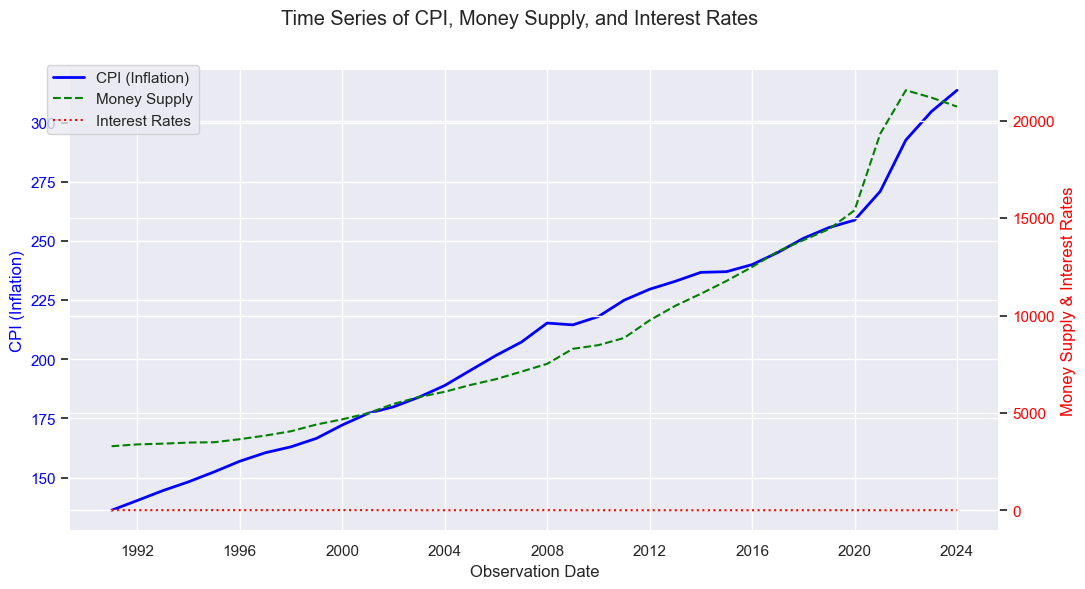

In [15]:

plt.figure(figsize=(12, 6))

# Primary Y-axis (CPI)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("Observation Date")
ax1.set_ylabel("CPI (Inflation)", color="blue")
ax1.plot(df.index, df["CPI"], label="CPI (Inflation)", color="blue", linewidth=2)
ax1.tick_params(axis='y', labelcolor="blue")

# Secondary Y-axis (Money Supply & Interest Rates)
ax2 = ax1.twinx()
ax2.set_ylabel("Money Supply & Interest Rates", color="red")
ax2.plot(df.index, df["M2SL"], label="Money Supply", color="green", linestyle="dashed")
ax2.plot(df.index, df["FEDFUNDS"], label="Interest Rates", color="red", linestyle="dotted")
ax2.tick_params(axis='y', labelcolor="red")

# Labels & Title
fig.suptitle("Time Series of CPI, Money Supply, and Interest Rates")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()


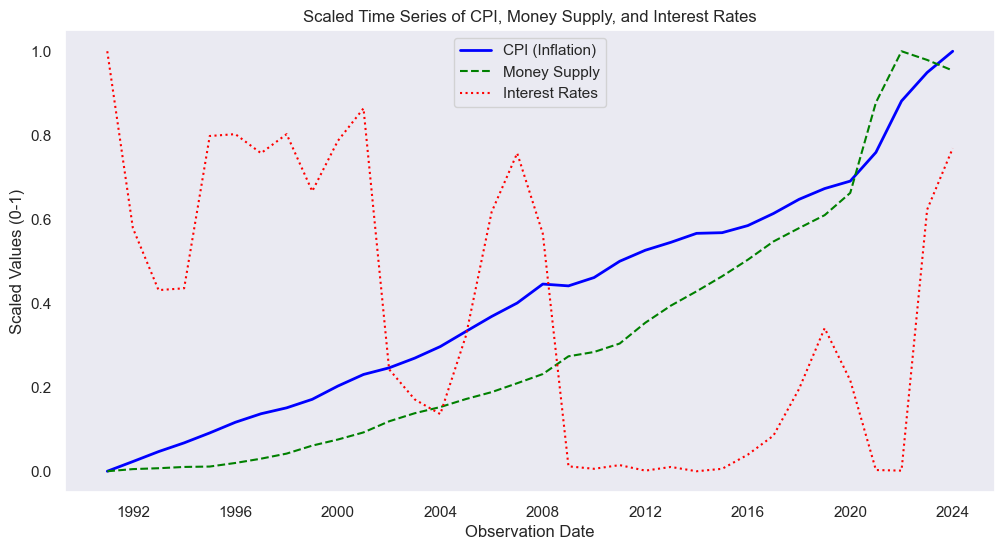

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

plt.figure(figsize=(12, 6))
plt.plot(df_scaled.index, df_scaled["CPI"], label="CPI (Inflation)", color="blue", linewidth=2)
plt.plot(df_scaled.index, df_scaled["M2SL"], label="Money Supply", color="green", linestyle="dashed")
plt.plot(df_scaled.index, df_scaled["FEDFUNDS"], label="Interest Rates", color="red", linestyle="dotted")

plt.xlabel("Observation Date")
plt.ylabel("Scaled Values (0-1)")
plt.title("Scaled Time Series of CPI, Money Supply, and Interest Rates")
plt.legend()
plt.grid()
plt.show()


In [14]:
X = df[['FEDFUNDS', 'M2SL']]  
Y = df['CPI']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(Y, X_scaled).fit()

print(model.summary())

beta_0 = model.params['const']
print(f'Intercept (β0): {beta_0}')

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     255.9
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           5.36e-20
Time:                        22:36:58   Log-Likelihood:                -130.94
No. Observations:                  34   AIC:                             267.9
Df Residuals:                      31   BIC:                             272.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        209.3164      2.045    102.367      0.0

In [16]:
error_term = model.resid

print(error_term.head())

observation_date
1991-01-01   -18.917272
1992-01-01   -20.678593
1993-01-01   -18.575324
1994-01-01   -15.271993
1995-01-01    -6.814955
dtype: float64


In [18]:
from sklearn.metrics import mean_absolute_error
Y_predicted = model.predict(X_scaled)
mae = mean_absolute_error(df['CPI'], Y_predicted)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 8.538621974131853


In [19]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(df['CPI'], Y_predicted))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 11.38478430255849
